# Background and Context:

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Objective :

* To predict whether a liability customer will buy a personal loan or not.

# Key Questions:

1 -  Which variables are most significant?

2 - Which segment of customers should be targeted more?

# Data Dictionary:

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

# Load data:

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

In [3]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df = data.copy()

In [5]:
# lets look at structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:
* The dataset consists of numeric variables and no objects are seen in the dataset.

In [7]:
df.tail(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [8]:
print(df.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


* Column names look ok .

In [9]:
# let us look at the shape of the data
df.shape

(5000, 14)

* There are 5000 rows and 14 variables

In [10]:
# Summary of dataset
df.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [11]:
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observations:
    
    *  As we can see above calculations for duplicates , there are no duplicates in the dataset.

# Check for Missing values :

In [13]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the dataset.

# Univariate Analysis:

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Observations on Age:

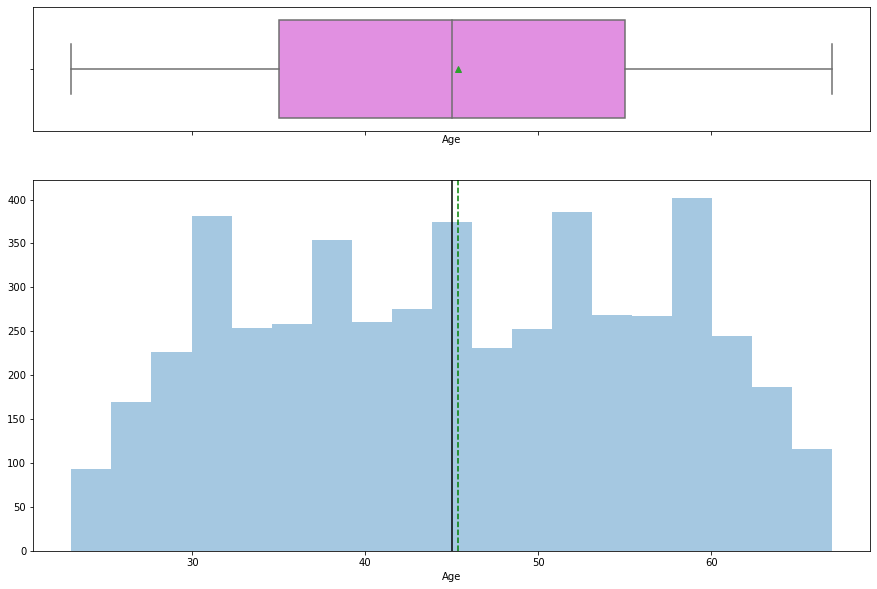

In [18]:
histogram_boxplot(data["Age"])

* The variable Age doesnt have any outliers and well distributed.

# Observations on Experience:

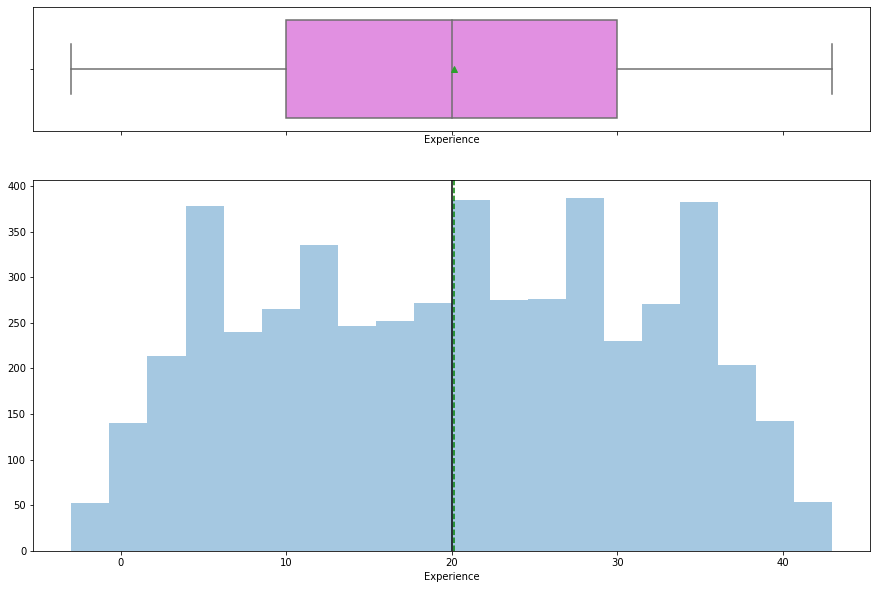

In [19]:
histogram_boxplot(data["Experience"])

* The variable Experience doesnt have any outliers and well distributed.

# Observations on Income:

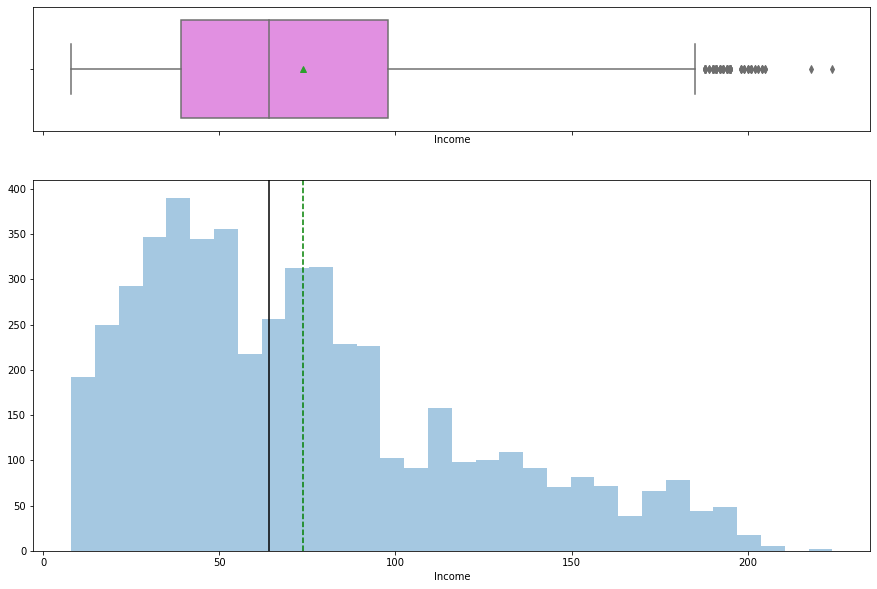

In [38]:
histogram_boxplot(df["Income"])

* The variable Income is right skewed with outliers.

# Observations on Family:

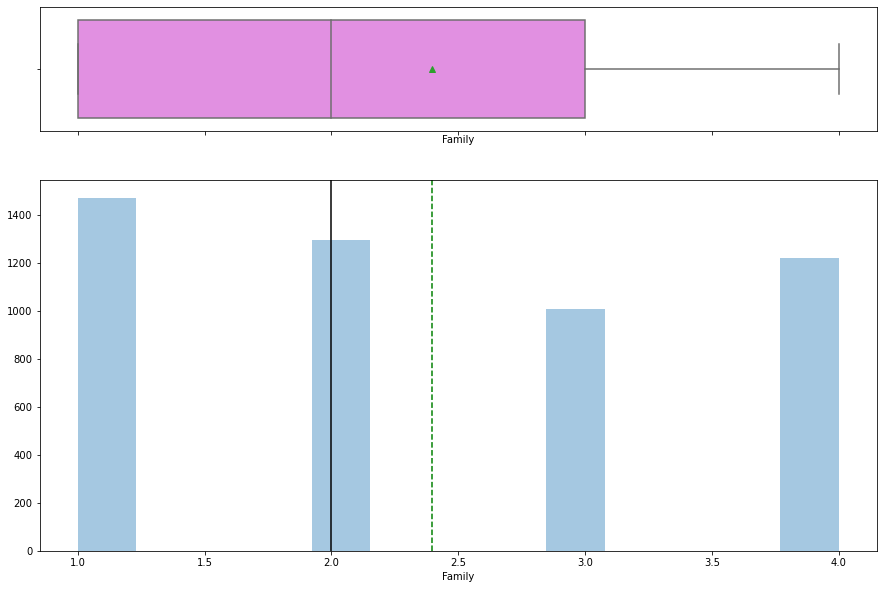

In [39]:
histogram_boxplot(df["Family"])

# Observations on Education:

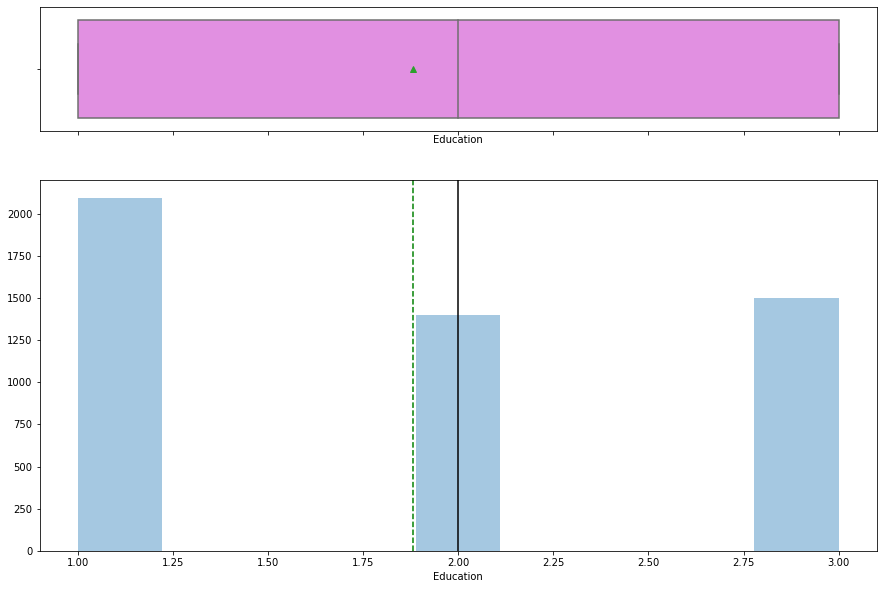

In [22]:
histogram_boxplot(df["Education"])

*The variable is equally distributed with no outliers.

# Observations on CCAvg:

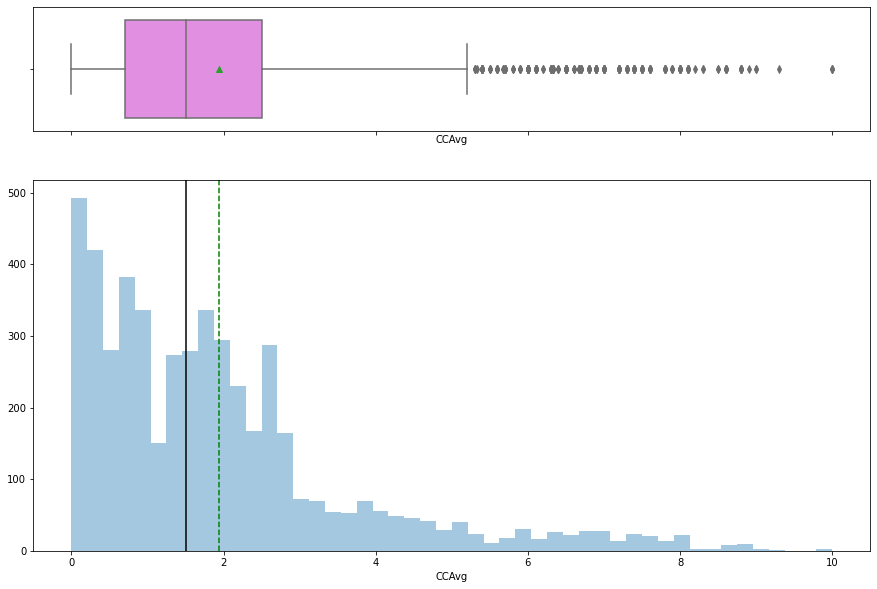

In [31]:
histogram_boxplot(df["CCAvg"])

# Observations on Mortgage:

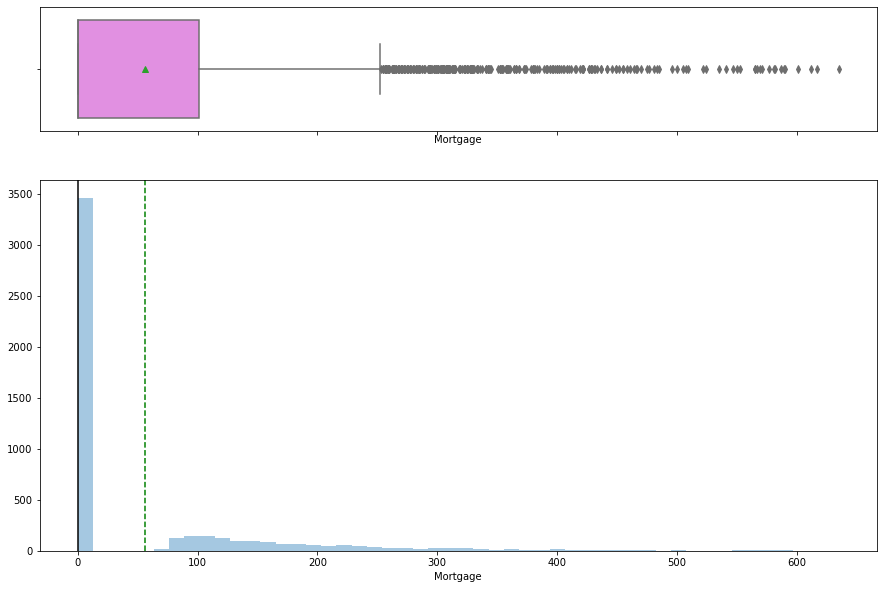

In [24]:
histogram_boxplot(df["Mortgage"])

* The variable Mortgage is right skewed with outliers.

# Observations on PersonalLoan:

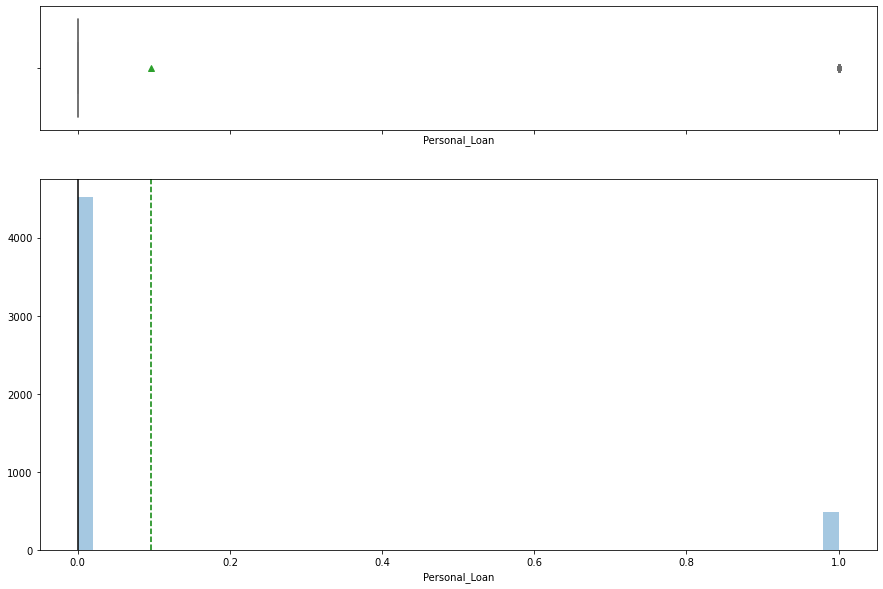

In [25]:
histogram_boxplot(df["Personal_Loan"])

In [101]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

# Observations on Experience

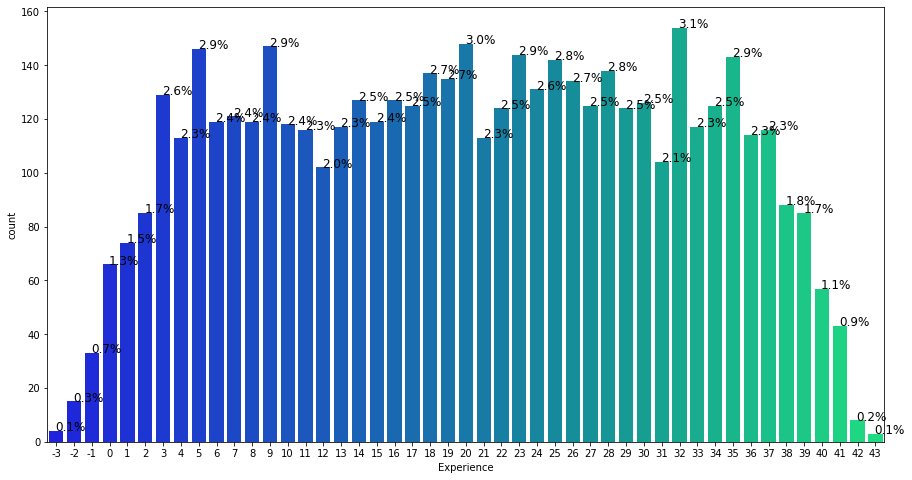

In [29]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df["Experience"],palette='winter')
perc_on_bar(ax,df["Experience"])

# Observations on people using CreditCard

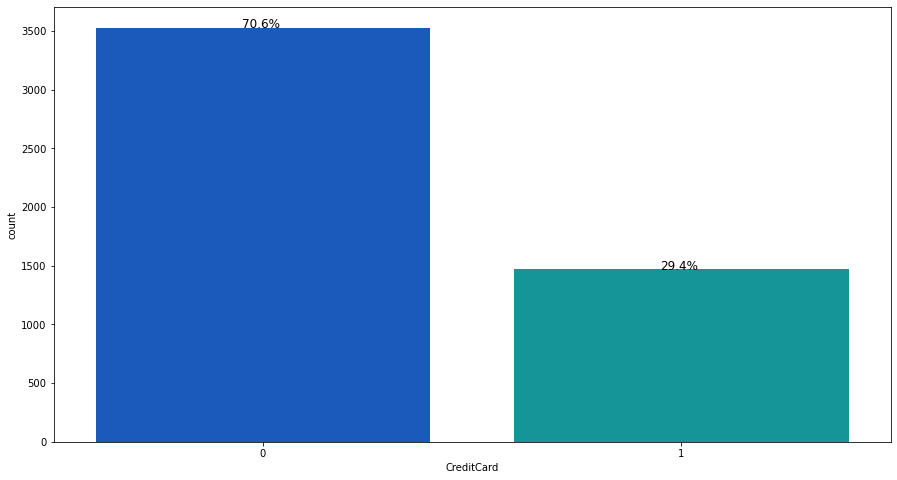

In [30]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df["CreditCard"],palette='winter')
perc_on_bar(ax,df["CreditCard"])

# Observations on people using Securities_Account

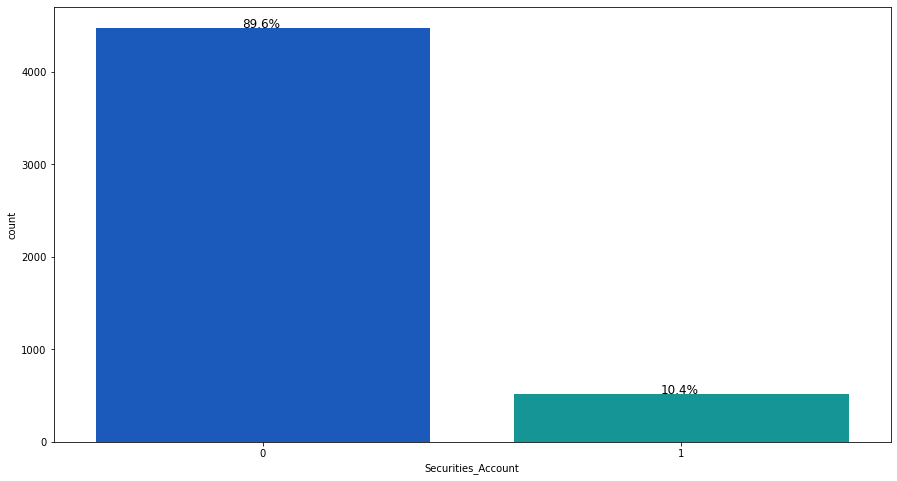

In [33]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df["Securities_Account"],palette='winter')
perc_on_bar(ax,df["Securities_Account"])

# Observations on people using online banking facilities:

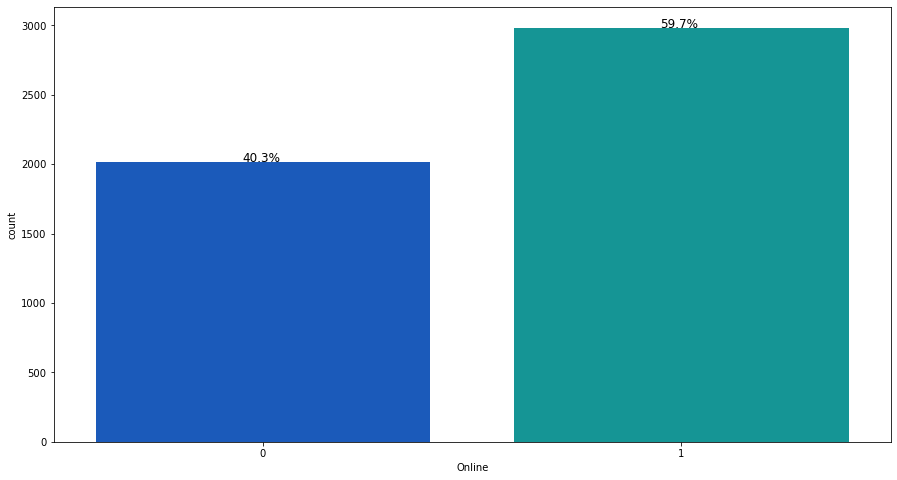

In [40]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df["Online"],palette='winter')
perc_on_bar(ax,df["Online"])

# Observations on people using CD account:

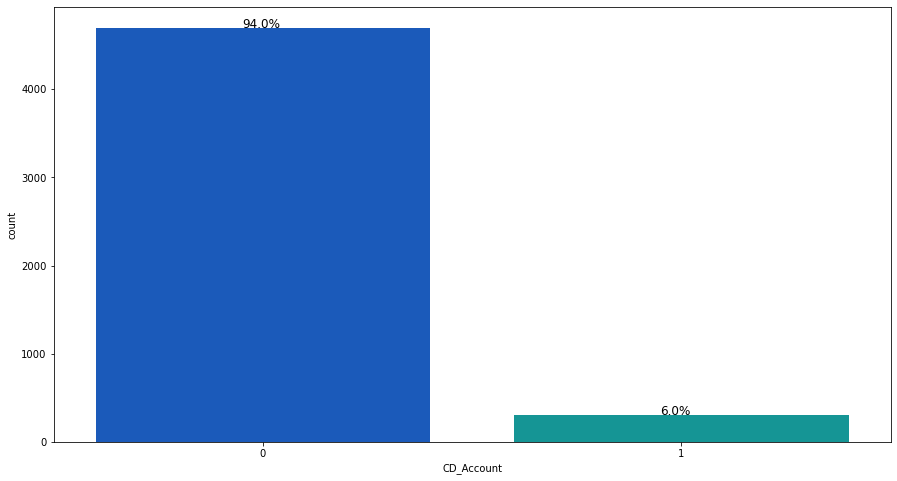

In [35]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data["CD_Account"],palette='winter')
perc_on_bar(ax,data["CD_Account"])

# Bivariate Distributions

# HeatMap:

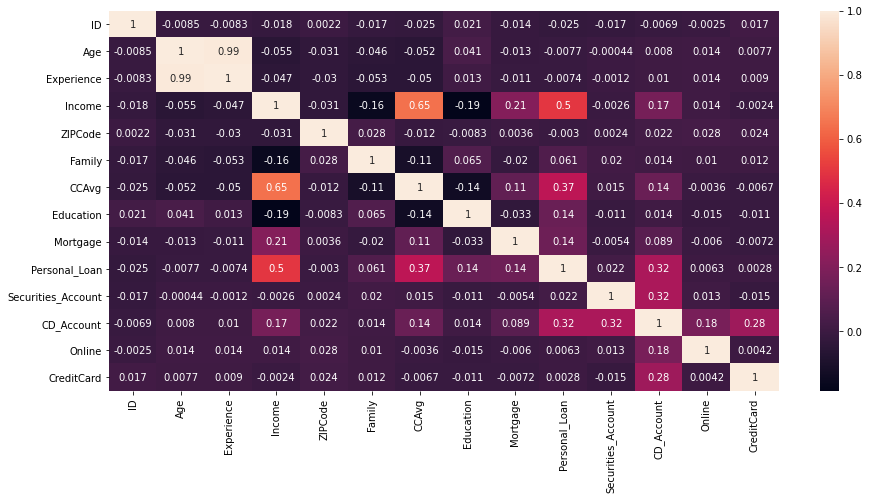

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

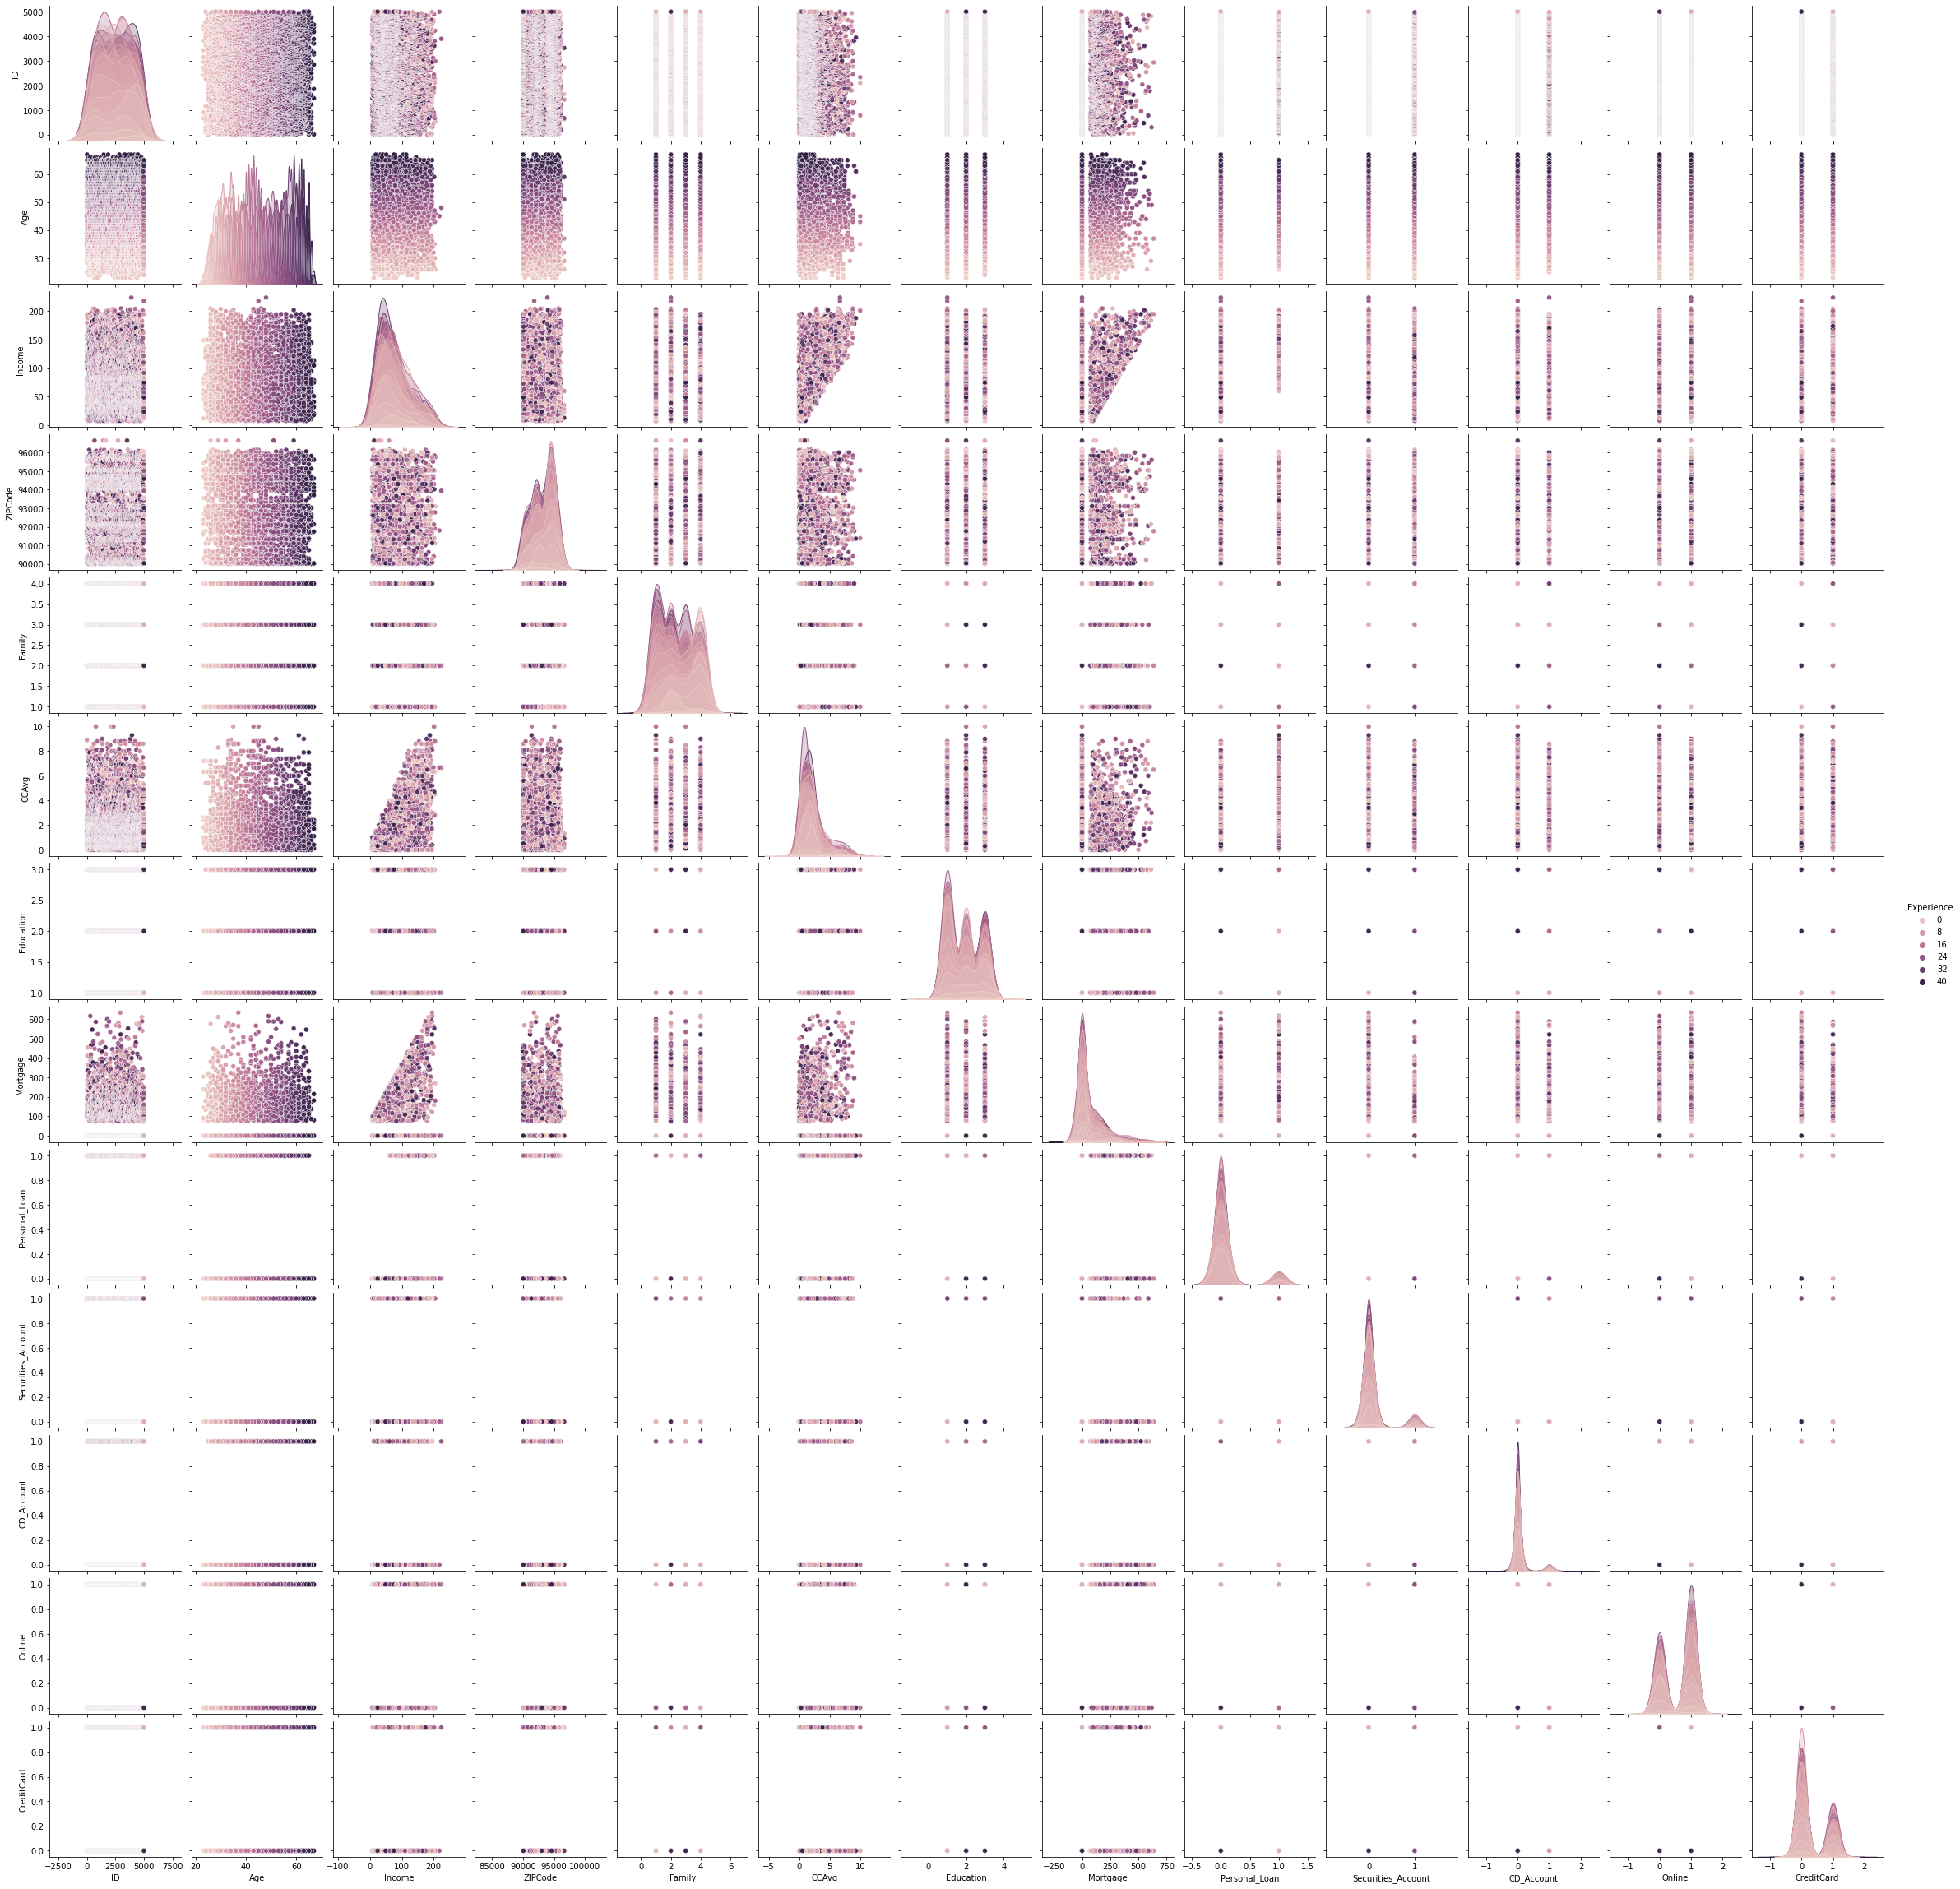

In [44]:
sns.pairplot(data=df,hue="Experience",)
plt.show()

# Age Vs Income:

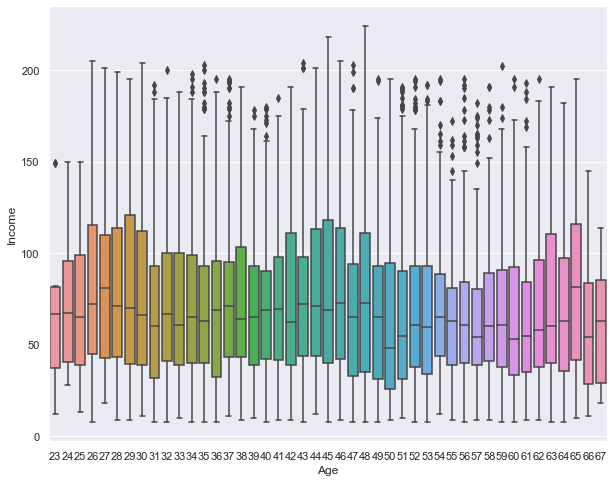

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Age'],df['Income'])
plt.show()

# Age Vs Experience:

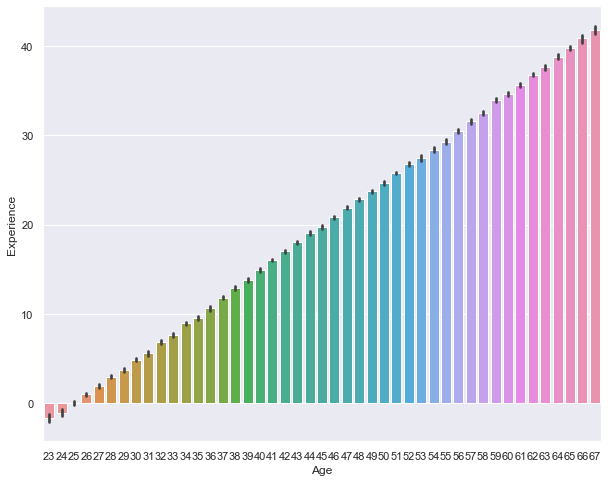

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(df['Age'],df['Experience'])
plt.show()

# Experience Vs Income

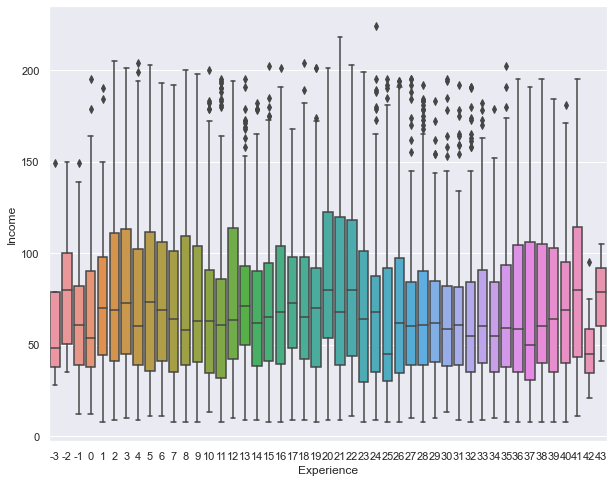

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Experience'],df['Income'])
plt.show()

# Multivariate Analysis using scatterplots:

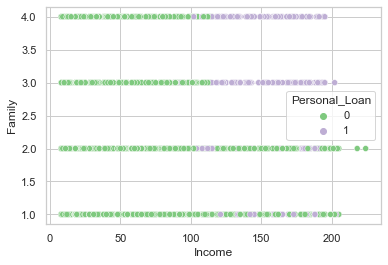

In [75]:
sns.scatterplot(x = "Income", y = "Family", hue='Personal_Loan' ,data = df, palette='Accent')
sns.set(style='whitegrid')
plt.show()

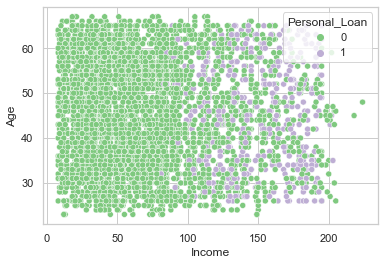

In [76]:
sns.scatterplot(x = "Income", y = "Age", hue='Personal_Loan' ,data = df, palette='Accent')
sns.set(style='whitegrid')
plt.show()

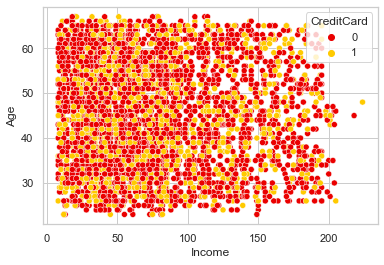

In [79]:
sns.scatterplot(x = "Income", y = "Age", hue='CreditCard' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

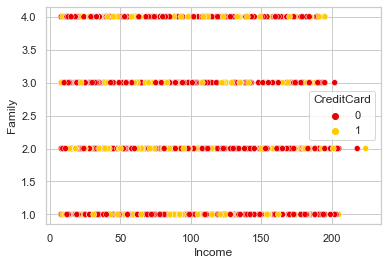

In [80]:
sns.scatterplot(x = "Income", y = "Family", hue='CreditCard' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

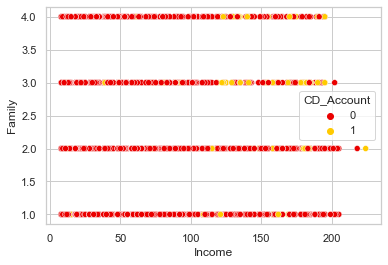

In [81]:
sns.scatterplot(x = "Income", y = "Family", hue='CD_Account' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

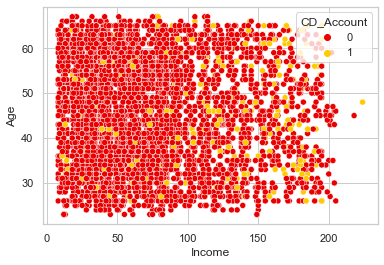

In [82]:
sns.scatterplot(x = "Income", y = "Age", hue='CD_Account' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

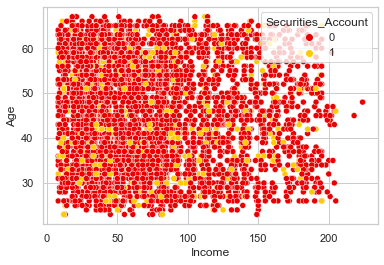

In [83]:
sns.scatterplot(x = "Income", y = "Age", hue='Securities_Account' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

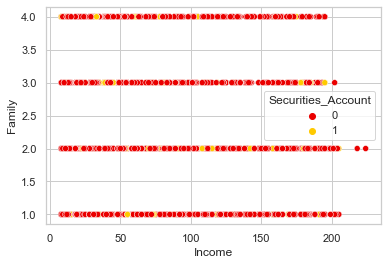

In [84]:
sns.scatterplot(x = "Income", y = "Family", hue='Securities_Account' ,data = df, palette='hot')
sns.set(style='whitegrid')
plt.show()

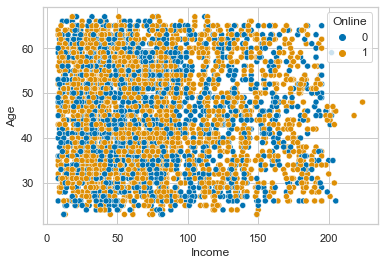

In [91]:
sns.scatterplot(x = "Income", y = "Age", hue='Online' ,data = df, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

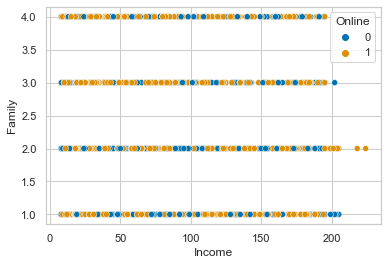

In [92]:
sns.scatterplot(x = "Income", y = "Family", hue='Online' ,data = df, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

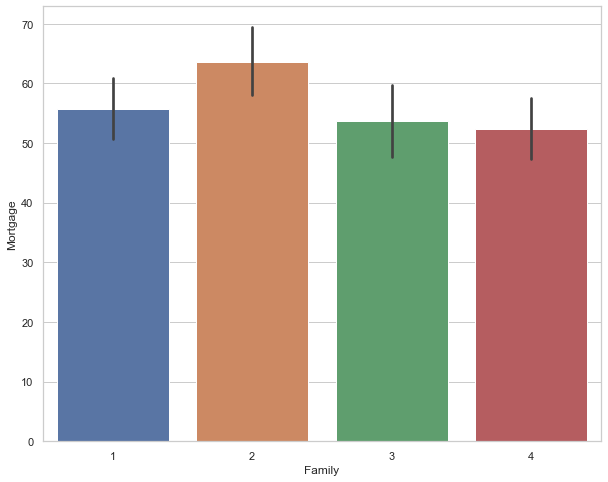

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(df['Family'],df['Mortgage'])
plt.show()

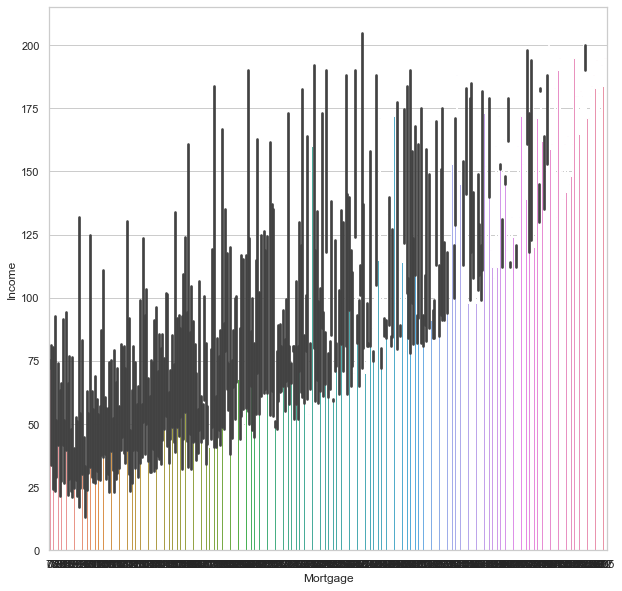

In [115]:
plt.figure(figsize=(10,10))
sns.barplot(df['Mortgage'],df['Income'])
plt.show()

# Data Pre-processing

In [120]:
#Dropping values which dont have much impact to this data model:
df = df.drop(['ID'],axis=1) 

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [118]:
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [121]:
#Dropping values which dont have much impact to this data model:
df = df.drop(['ZIPCode'],axis=1) 

In [122]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [123]:
dummy_data = pd.get_dummies(df)
dummy_data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [124]:
column_names = list(df)
column_names.remove('Personal_Loan')                     # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


In [125]:
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan']

In [126]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 11) (1500, 11)


# Model Building


# Logistic Regression Using sklearn

In [127]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

# Prediction on train:

In [128]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['above 50K','below 50K']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

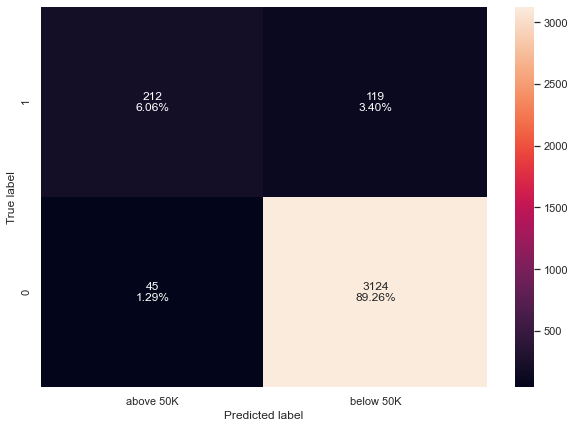

In [129]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

# Prediction on test:

confusion matrix = 



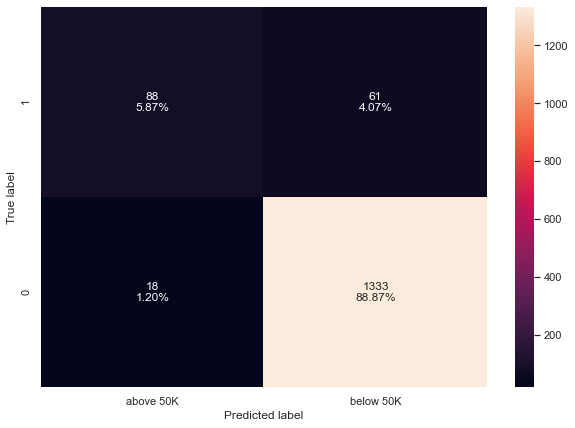

In [131]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [132]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.9531428571428572
Accuracy on test data: 0.9473333333333334


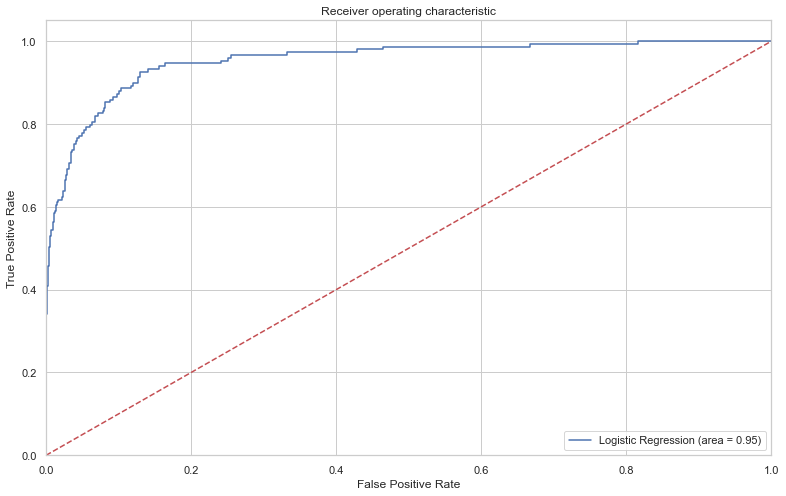

In [133]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [134]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.057059848962417545


In [135]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

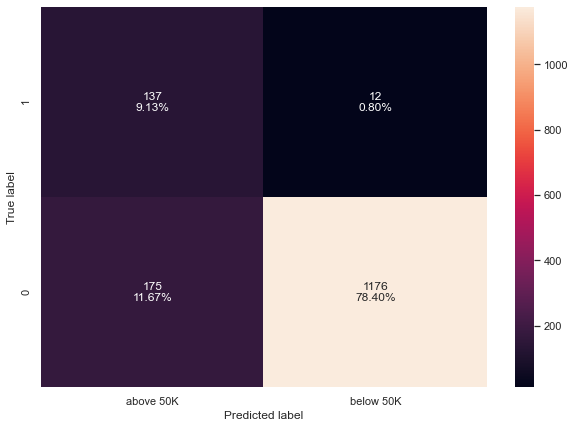

In [136]:
make_confusion_matrix(y_test,y_pred_ts)

In [137]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.8514285714285714
Accuracy on test data: 0.8753333333333333


Observations:

* After using optimal threshold we see that true positives have increased from 5% to 9%. and false positive has decreased from 4% to 0.8%

In [138]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [141]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 453.341635
Age                    93.675767
Experience             93.577470
Income                  1.858986
Family                  1.034041
CCAvg                   1.728938
Education               1.114846
Mortgage                1.051253
Securities_Account      1.137176
CD_Account              1.329842
Online                  1.039584
CreditCard              1.107884
dtype: float64



**We observe that Age and Experience  exhibit high multicollinearity.**

# Build the logistic regression model 

**Split into training and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

In [144]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.129537
         Iterations 9


In [145]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.5861
Time:                        11:46:43   Log-Likelihood:                -453.38
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.001e-269
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.5080      0.027    -18.815      0.000      -0.561      -0.455
Experience             0.5045      0.030     16.909      0.000       0.446       0.563
Income              

# Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [146]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [147]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.005
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
CD_Account          3.89       49.00         0.98  0.00
Education           1.73        5.62         0.85  0.00
Family              0.66        1.94         0.66  0.00
Experience          0.50        1.66         0.62  0.00
CCAvg               0.17        1.18         0.54  0.00
Income              0.05        1.05         0.51  0.00
Age                -0.51        0.60         0.38  0.00
Online             -0.69        0.50         0.33  0.00
CreditCard         -1.26        0.28         0.22  0.00
Securities_Account -1.27        0.28         0.22  0.00

Observations:
    
    *  The CD_Account, Education,Family,Experience, CCAvg and Income are the variables that have a proabability of above 50% .

Question 1: **Lets look at most significant variable**

In [149]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant variables category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant variables  are '+end,':\n',sig_var)

Most significant variables category wise are :
 ['CD_Account', 'Education', 'Family', 'Experience', 'Income', 'Age', 'CreditCard']
************************************************************************************************************************
Most overall significant variables  are  :
 ['CD_Account']


### Prediction of the model
  **Prediction on Train data**

In [151]:
pred_train = lg.predict(X_train)
pred_train = np.round(pred_train)

confusion matrix = 



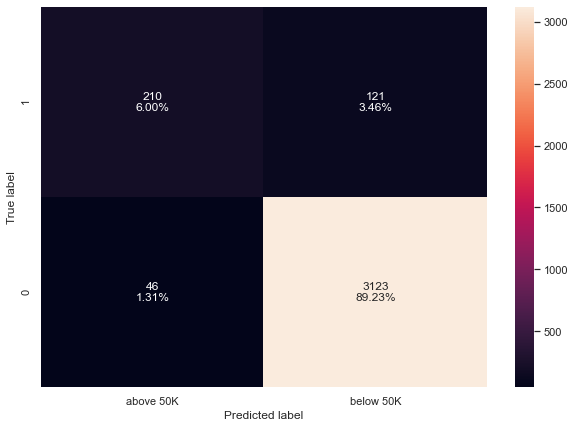

In [152]:
print("confusion matrix = \n")
make_confusion_matrix(y_train,pred_train )

 **Prediction on Test data**

confusion matrix = 



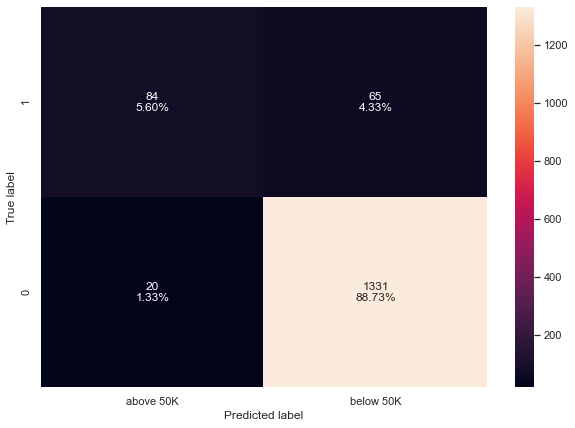

In [154]:
pred_ts = lg.predict(X_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_ts )

In [155]:
#Accuracy with a threhold of 0.5
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_ts))

Accuracy on train data: 0.9522857142857143
Accuracy on test data: 0.9433333333333334


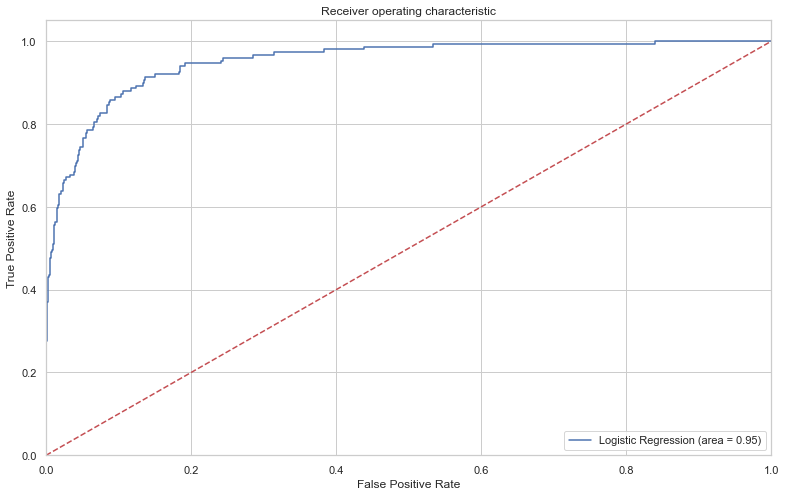

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Choosing Optimal threshold

In [157]:
pred_train = lg.predict(X_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08870397766523237


In [158]:
target_names = ['below 50K', 'above 50K']
y_pred_tr = (lg.predict(X_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X_test)>optimal_threshold).astype(int)

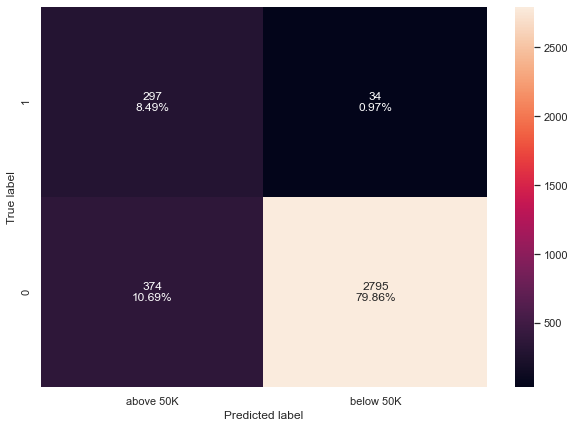

In [159]:
make_confusion_matrix(y_train,y_pred_tr )

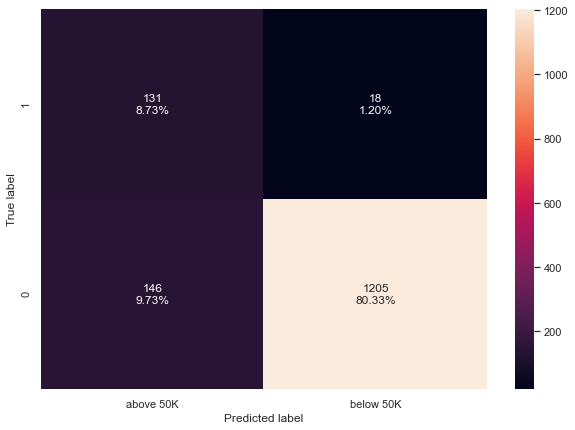

In [160]:
make_confusion_matrix(y_test,y_pred_ts)

In [161]:
#Accuracy with optimal threshold
print('Accuracy on train data:',accuracy_score(y_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test,y_pred_ts))

Accuracy on train data: 0.8834285714285715
Accuracy on test data: 0.8906666666666667


**Observation**
* After choosing optimal threshold , true positives has increased from 6% to 8% while false positive has decreased from 4% to 0.1%
* The accuracy on test data is 89% after  choosing optimal threshold. 


# Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [162]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [163]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [164]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

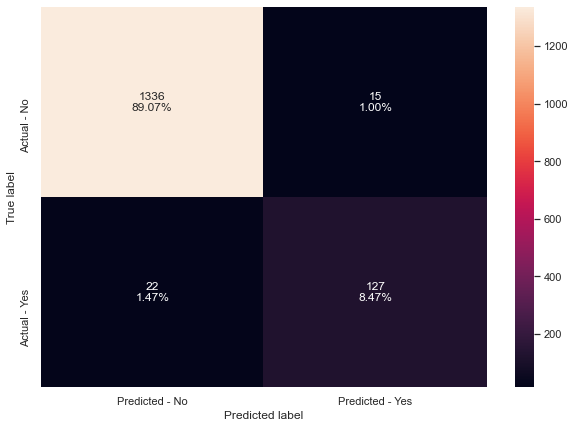

In [165]:
make_confusion_matrix(model,y_test)

In [166]:
y_train.value_counts(1)

0   0.91
1   0.09
Name: Personal_Loan, dtype: float64

We only have 9% of positive classes, so if our model marks each sample as negative, then also we'll get 91% accuracy, hence accuracy is not a good metric to evaluate here.

In [167]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [168]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8523489932885906


# Visualizing the Decision Tree

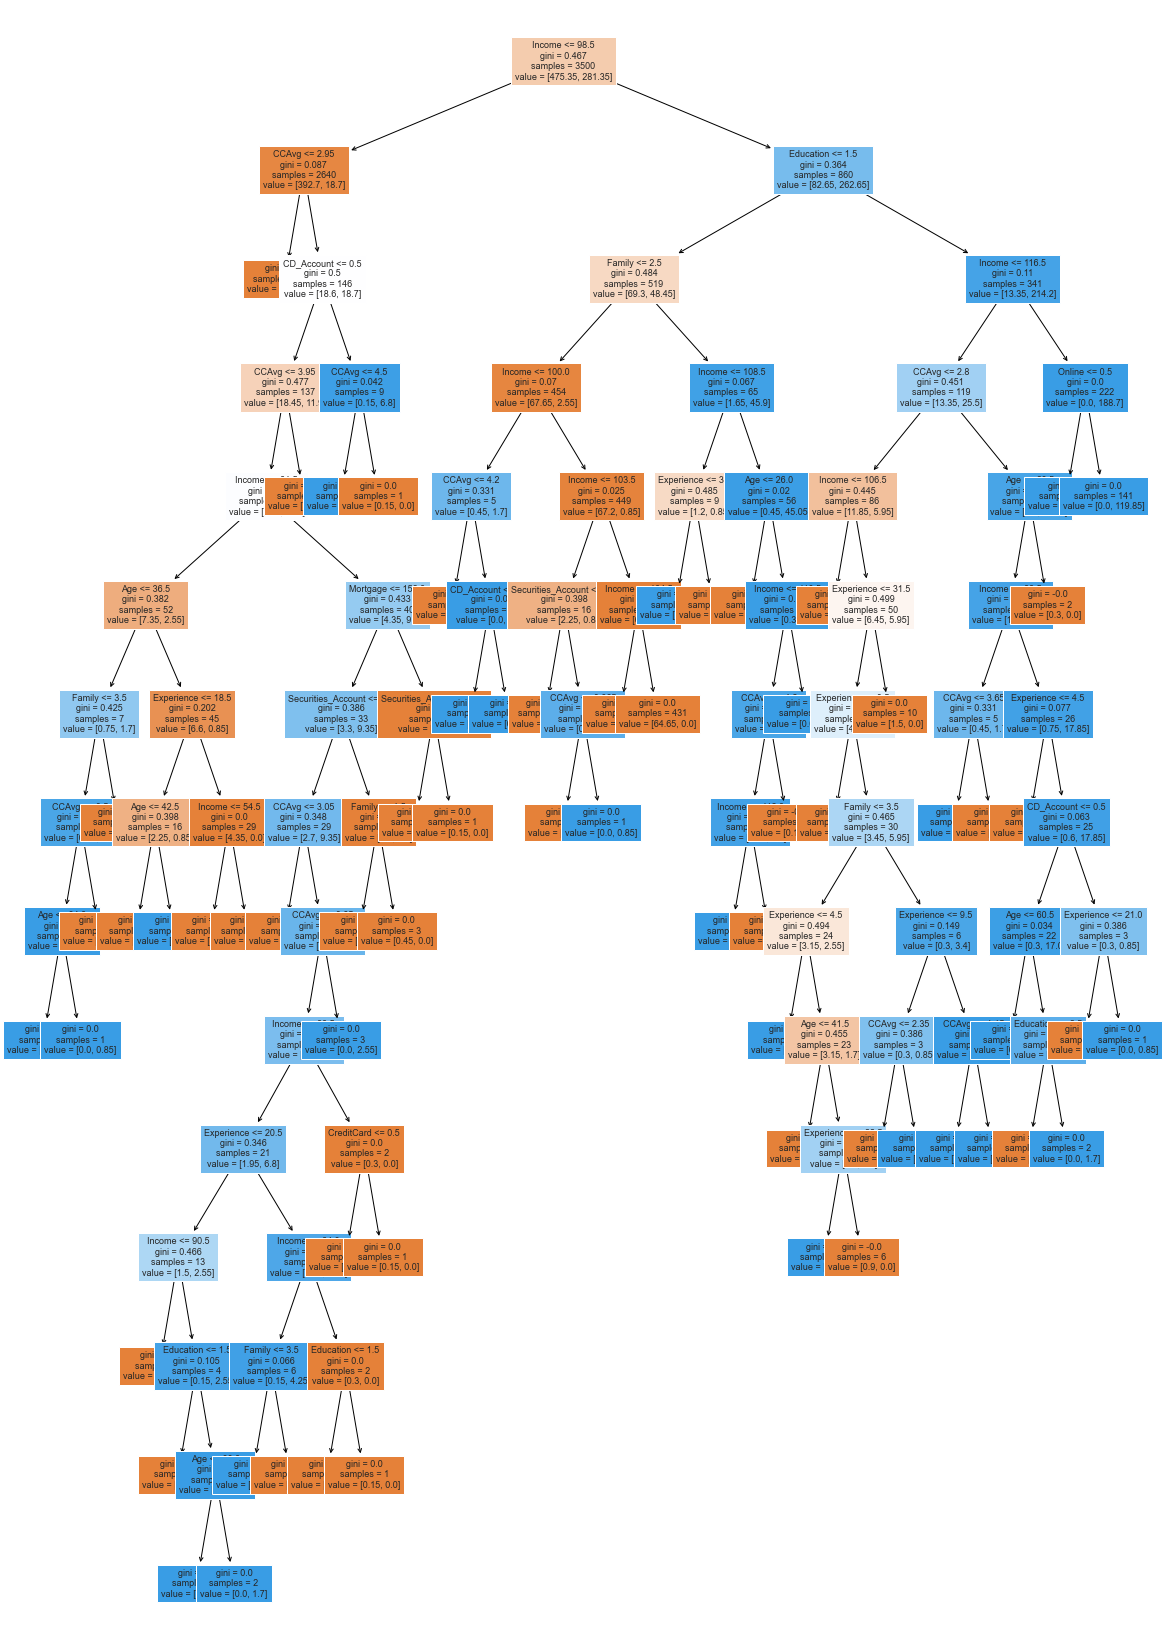

In [169]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [170]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- Age >  34.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- Experience <= 18.50
|   |   |   |   |   |   |   |--- Age <= 42.50
|   |   |   |   |   |   |   |   |--- weights: [2.25, 0.00]

In [171]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.60
Family             0.14
Education          0.13
CCAvg              0.09
Experience         0.02
Age                0.01
CD_Account         0.01
Securities_Account 0.00
Mortgage           0.00
Online             0.00
CreditCard         0.00


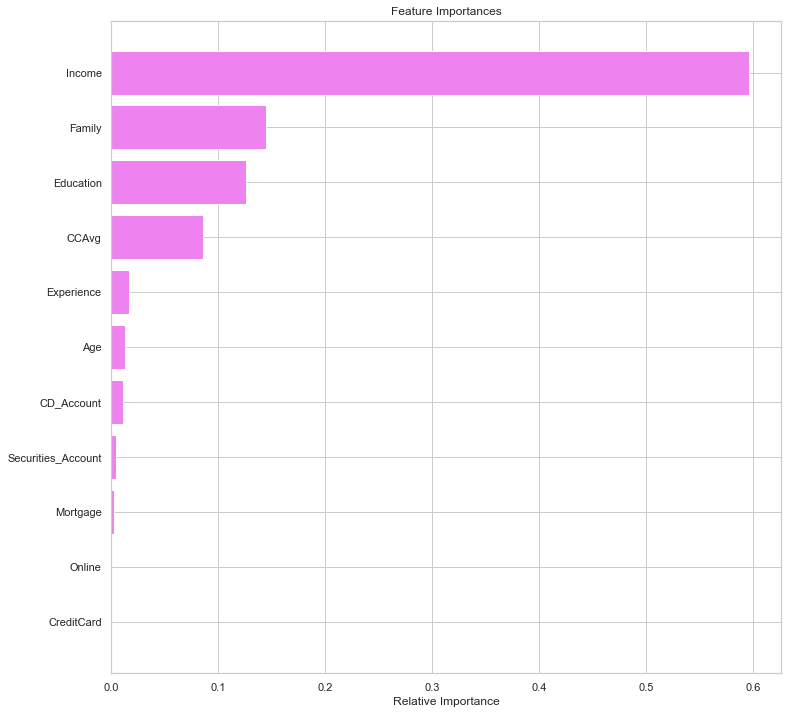

In [172]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income and Family are the top two important features to predict customer purchase for Personal Loans.

# Conclusions and Recommendations:

* Customers with high Income and Family size tend to go for the purchase of Personal Loans.
 * Customers with high Experience and Education background tend to earn more , which makes them to purchase loans .
 * In the analysis using Logistic Regression, the most significant variable is CD_account.
 * The accuracy on test data is 89% after  choosing optimal threshold in Logistic Regression whereas the Recall on test data is 85%.
 